In [1]:
#basic
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('ggplot')
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

#for evaluation
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal

import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
# The tech stocks we'll use for this analysis
#stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
stock_list = ['LUV', 'DAL', 'AAL', 'UAL']
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

#tech_Data= DataReader(tech_list, 'yahoo',start, end)
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in stock_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
#company_list = [AAPL, GOOG, MSFT, AMZN]
company_list= [LUV, DAL, AAL, UAL]
#company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]
company_name = ["Southwest", "Delta", "American", "United"]

In [4]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2016-09-08,39.060001,38.430000,38.540001,38.759998,7353400.0,37.296150,Southwest
2016-09-09,38.689999,37.180000,38.680000,37.340000,9013300.0,35.929779,Southwest
2016-09-12,37.930000,36.639999,36.939999,37.820000,5192900.0,36.391651,Southwest
2016-09-13,38.090000,37.009998,37.730000,37.139999,6749000.0,35.737324,Southwest
2016-09-14,37.410000,36.650002,37.139999,36.840000,5071700.0,35.448666,Southwest
2016-09-15,37.119999,36.450001,36.810001,36.990002,4405400.0,35.592999,Southwest
2016-09-16,36.900002,36.509998,36.900002,36.590000,6268400.0,35.208107,Southwest
2016-09-19,37.180000,36.590000,36.709999,36.700001,5395200.0,35.313946,Southwest
2016-09-20,37.200001,36.630001,36.790001,36.820000,3312000.0,35.429409,Southwest


In [5]:
#Check for missing values
for company in company_list:
    print(company.isna().sum())

High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64
High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64
High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64
High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
dtype: int64


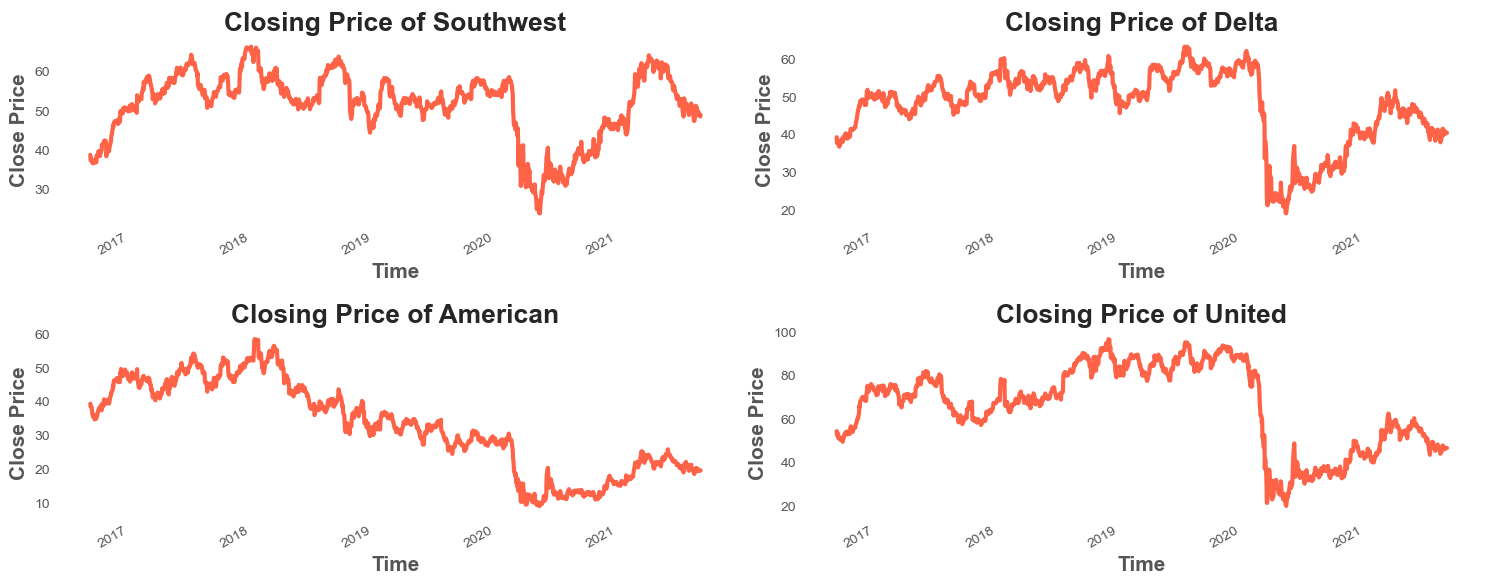

In [6]:
#plot the closing price vs time 

with plt.style.context('images/presentation.mplstyle'):
    plt.figure(figsize=(15, 6))
    plt.subplots_adjust(top=1.25, bottom=1.2)

    for i, company in enumerate(company_list, 1):
        plt.subplot(2, 2, i)
        company['Close'].plot()
        #company['Volume'].plot()
        plt.ylabel('Close Price')
        plt.xlabel('Time')
        plt.title(f"Closing Price of {company_name[i - 1]}")
    
    plt.tight_layout()
    #plt.savefig('images/overview.png')

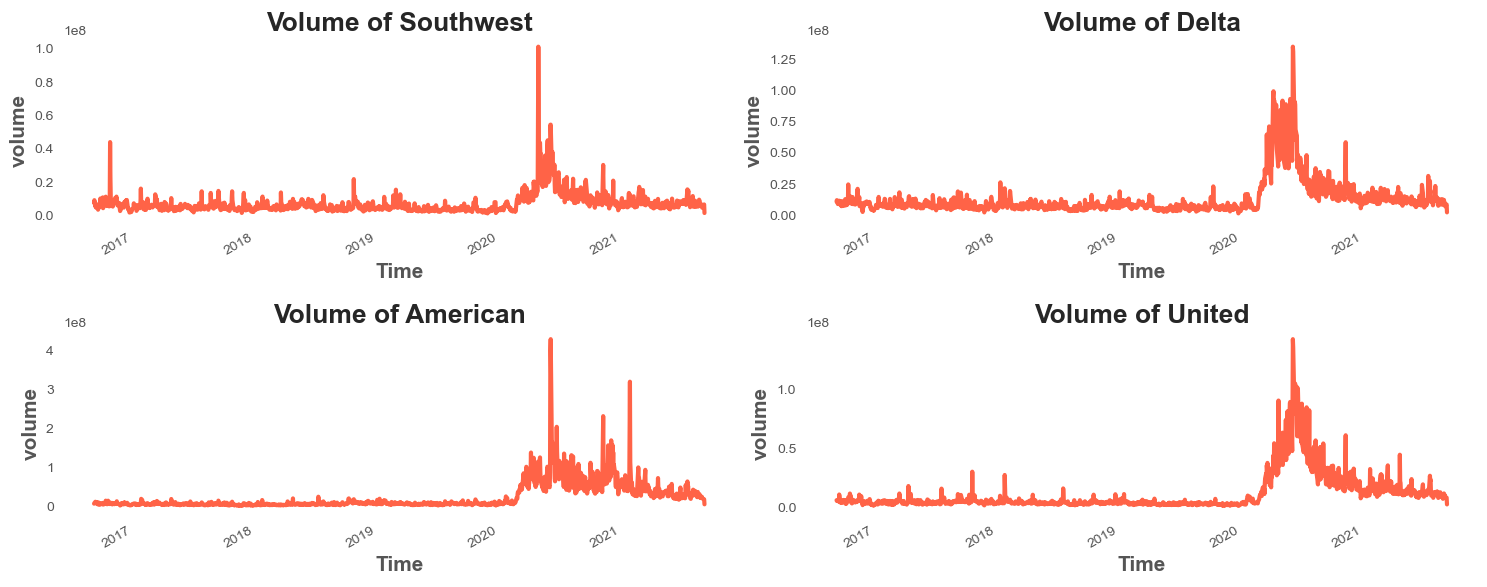

In [7]:
#plot the volumne vs time 
with plt.style.context('images/presentation.mplstyle'):
    plt.figure(figsize=(15, 6))
    plt.subplots_adjust(top=1.25, bottom=1.2)

    for i, company in enumerate(company_list, 1):
        plt.subplot(2, 2, i)
        company['Volume'].plot()
        plt.ylabel('volume')
        plt.xlabel('Time')
        plt.title(f"Volume of {company_name[i - 1]}")
    
    plt.tight_layout()

## Testing for stationary:

In [8]:
company_list= [LUV, DAL, AAL, UAL]

def ADF_test(company_list):
    for company in company_list:
        print(company['company_name'][0])
        test_results_sw = adfuller(company['Close'])
        print(f"ADF test statistic: {test_results_sw[0]}")
        print(f"p-value: {test_results_sw[1]}")
        print("Critical thresholds:")
        for key, value in test_results_sw[4].items():
            print(f"\t{key}: {value}")


In [9]:
ADF_test(company_list)

Southwest
ADF test statistic: -2.995566293332272
p-value: 0.03531053236241924
Critical thresholds:
	1%: -3.4356090875394525
	5%: -2.863862410805964
	10%: -2.568006480268158
Delta
ADF test statistic: -2.3290614073883873
p-value: 0.16276629891283678
Critical thresholds:
	1%: -3.4356133204636095
	5%: -2.8638642784217305
	10%: -2.5680074748794373
American
ADF test statistic: -1.0357558193052143
p-value: 0.7400008901265701
Critical thresholds:
	1%: -3.4355629707955395
	5%: -2.863842063387667
	10%: -2.567995644141416
United
ADF test statistic: -1.3976208822239637
p-value: 0.5834161645141376
Critical thresholds:
	1%: -3.4355588184378574
	5%: -2.8638402312881497
	10%: -2.5679946684494275


> if the test statistic is lower than the critical value shown, reject the null hypothesis and infer that the time series is stationary.

> Conclusion: none is stationary 

In [10]:
AAL['year'] = [d.year for d in AAL.index]
AAL['month'] = [d.strftime('%b') for d in AAL.index]
years = AAL['year'].unique()

## Trend and seasonality 

In [11]:
LUV['year'] = [d.year for d in LUV.index]
LUV['month'] = [d.strftime('%b') for d in LUV.index]
years = LUV['year'].unique()

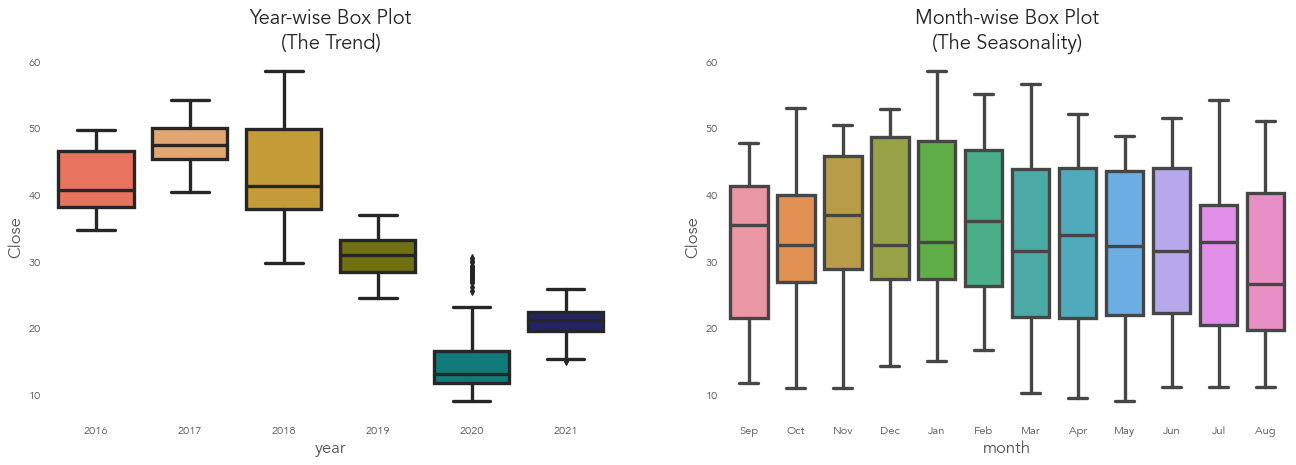

In [12]:
slc= (AAL['year'] > 2011) & (AAL['year'] <= 2021)

with plt.style.context('images/presentation.mplstyle'):
    fig, axes = plt.subplots(1, 2, figsize=(20,6), dpi= 80)
    sns.boxplot(x='year', y='Close', data=AAL.loc[slc], ax=axes[0])
    sns.boxplot(x='month', y='Close', data=AAL.loc[slc])

    # Set Title
    axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
    plt.show()

In [13]:
#seasonal decompose cannot have missing days 

temp_monthly = AAL.resample('M').asfreq().ffill()

In [14]:
temp_monthly.isna().sum()

High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
company_name    0
year            0
month           0
dtype: int64

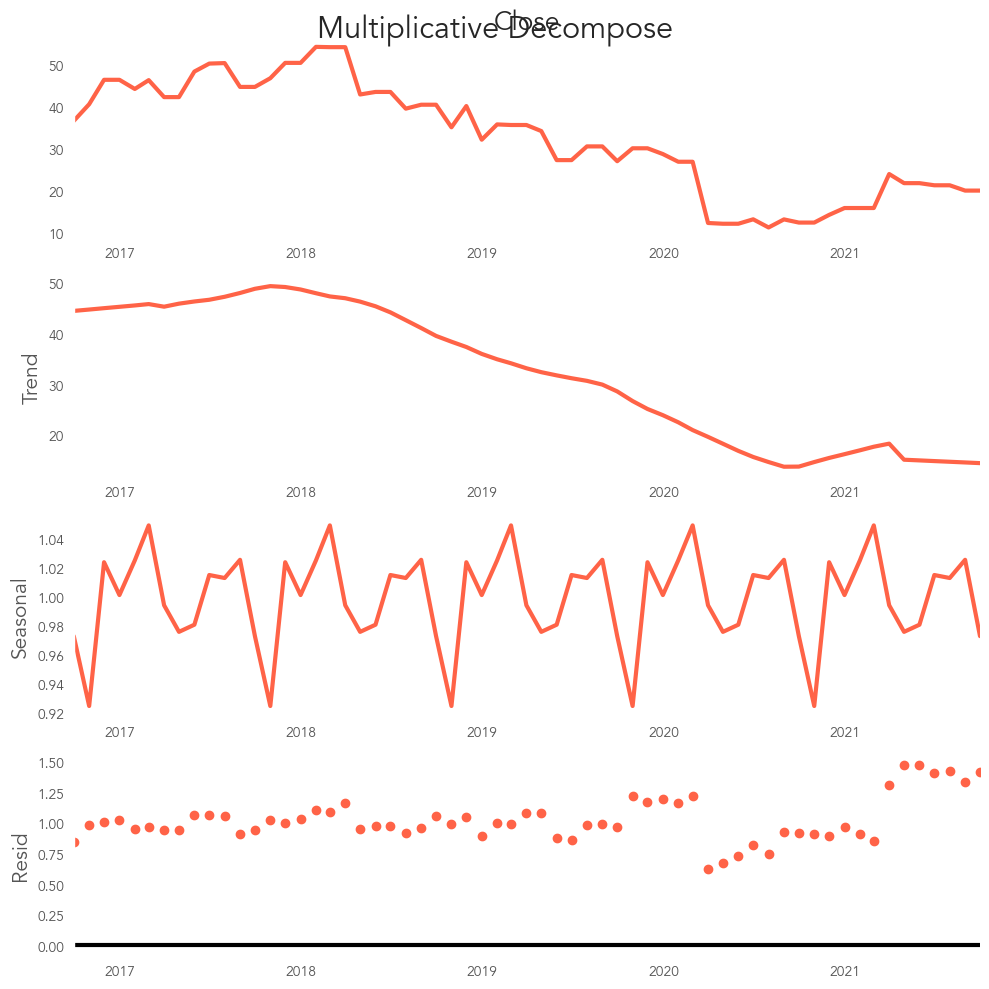

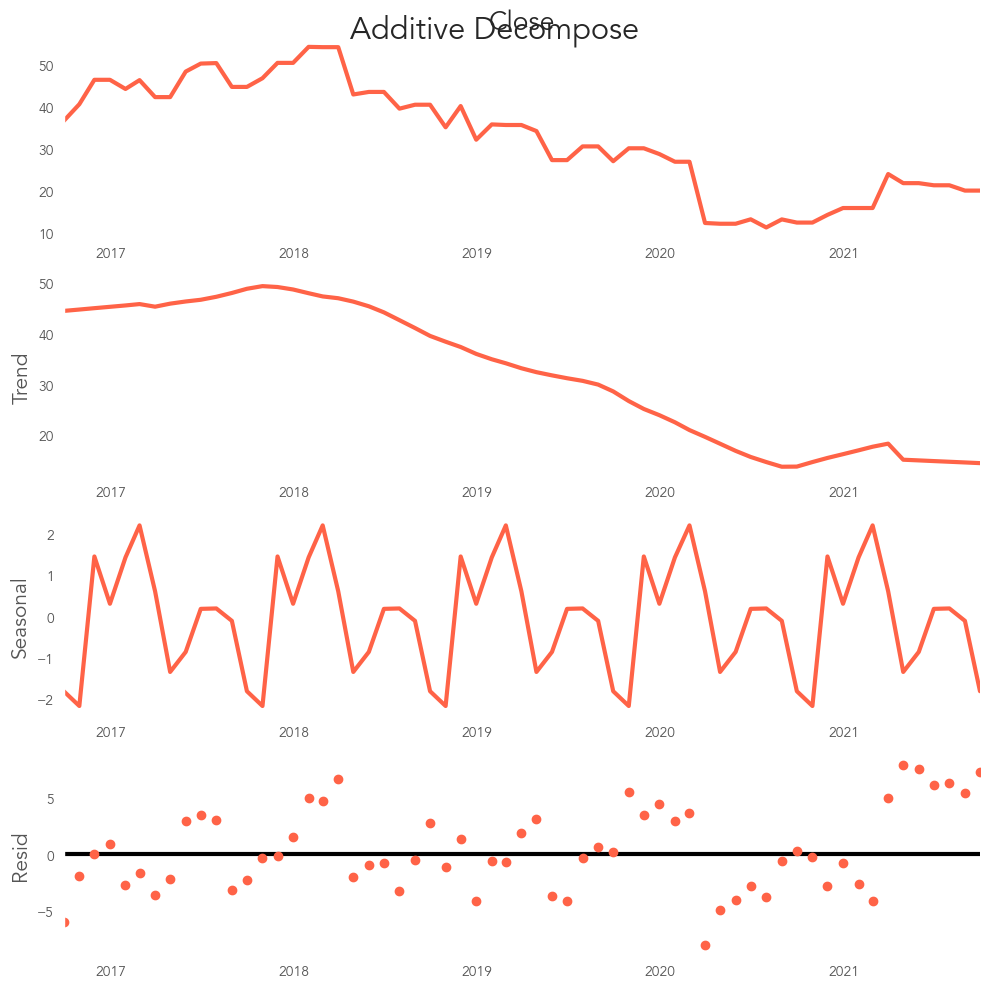

In [15]:
# Multiplicative Decomposition(Value = Base Level x Trend x Seasonality x Error)
result_mul = seasonal_decompose(temp_monthly['Close'], model='multiplicative',extrapolate_trend='freq')

# Additive Decomposition (Value = Base Level + Trend + Seasonality + Error)
result_add = seasonal_decompose(temp_monthly['Close'], model='additive',extrapolate_trend='freq')

# Plot
with plt.style.context('images/presentation.mplstyle'):
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.show()

> there is no exponential increase in the amplitudes over time so additive model is more useful 

In [16]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head(20)

,seas,trend,resid,actual_values
Date,,,,
2016-09-30,0.972719,44.442182,0.846870,36.610001
2016-10-31,0.924427,44.711171,0.982285,40.599998
2016-11-30,1.023797,44.980160,1.008457,46.439999
2016-12-31,1.001105,45.249149,1.025185,46.439999
2017-01-31,1.025074,45.518138,0.948361,44.250000
2017-02-28,1.049256,45.787127,0.964980,46.360001
2017-03-31,0.994049,45.272916,0.939927,42.299999
2017-04-30,0.975672,45.870833,0.945149,42.299999
2017-05-31,0.980610,46.298750,1.066276,48.410000


## Remove trend

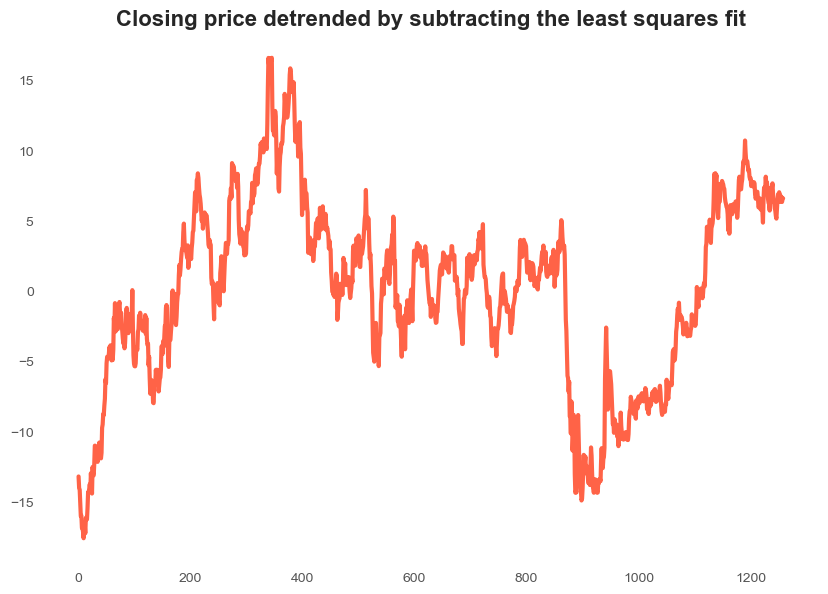

In [17]:
detrended = signal.detrend(AAL.Close.values)

with plt.style.context('images/presentation.mplstyle'):
    plt.plot(detrended)
    plt.title('Closing price detrended by subtracting the least squares fit', fontsize=16)

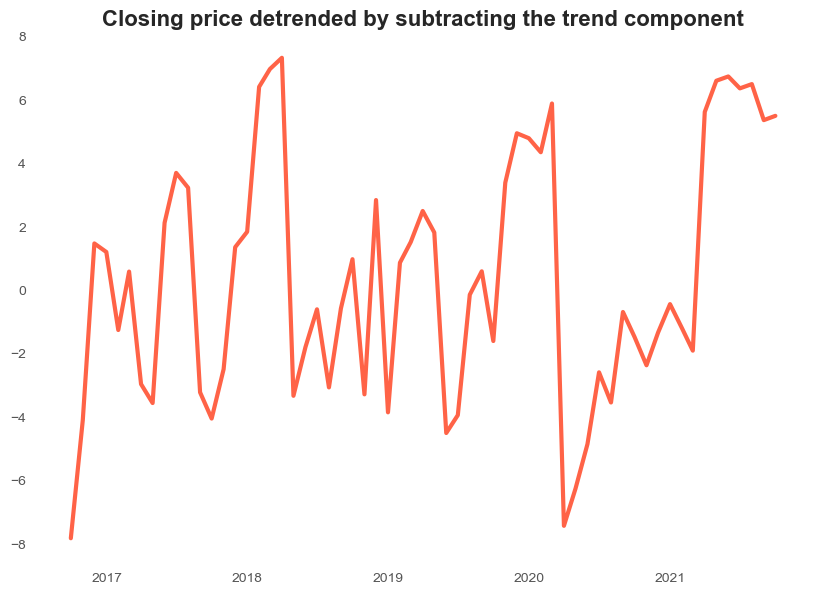

In [18]:
detrended =temp_monthly.Close.values - result_mul.trend

with plt.style.context('images/presentation.mplstyle'):
    plt.plot(detrended)
    plt.title('Closing price detrended by subtracting the trend component', fontsize=16)

## Remove seasonality 

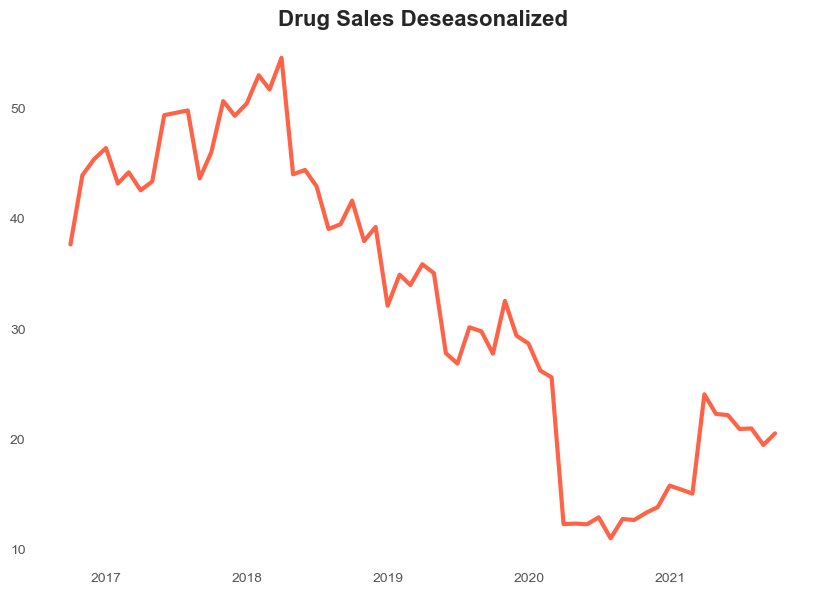

In [19]:
deseasonalized = temp_monthly.Close.values / result_mul.seasonal

# Plot
with plt.style.context('images/presentation.mplstyle'):
    plt.plot(deseasonalized)
    plt.title('Drug Sales Deseasonalized', fontsize=16)
    plt.plot()

## Autocorrelation Function (ACF) plot for seasonlaity 

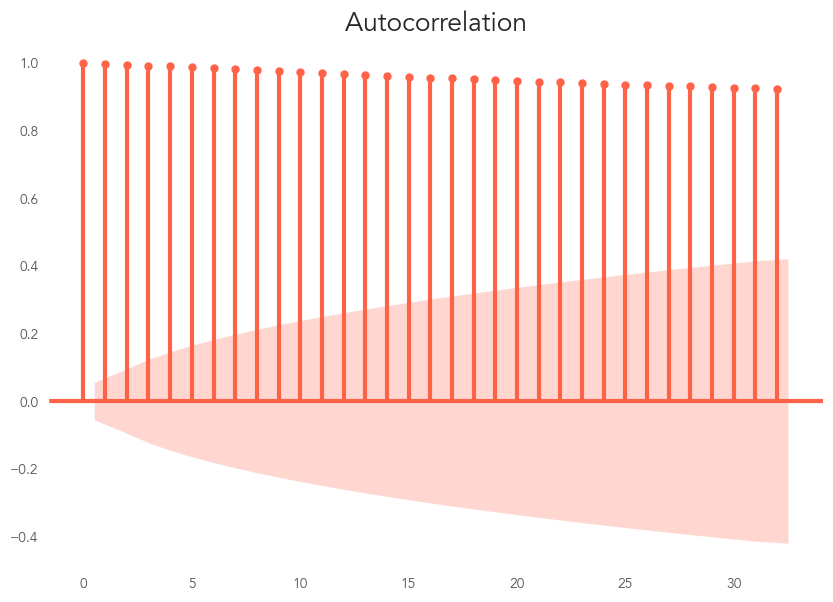

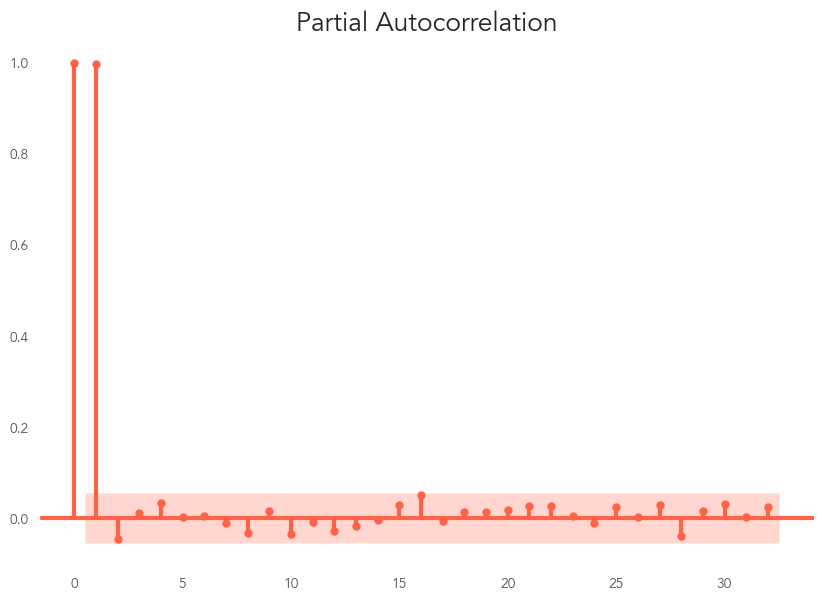

In [20]:
with plt.style.context('images/presentation.mplstyle'):
    plot_acf(AAL['Close'])
    plot_pacf(AAL['Close'],method='ywm')
    plt.show()

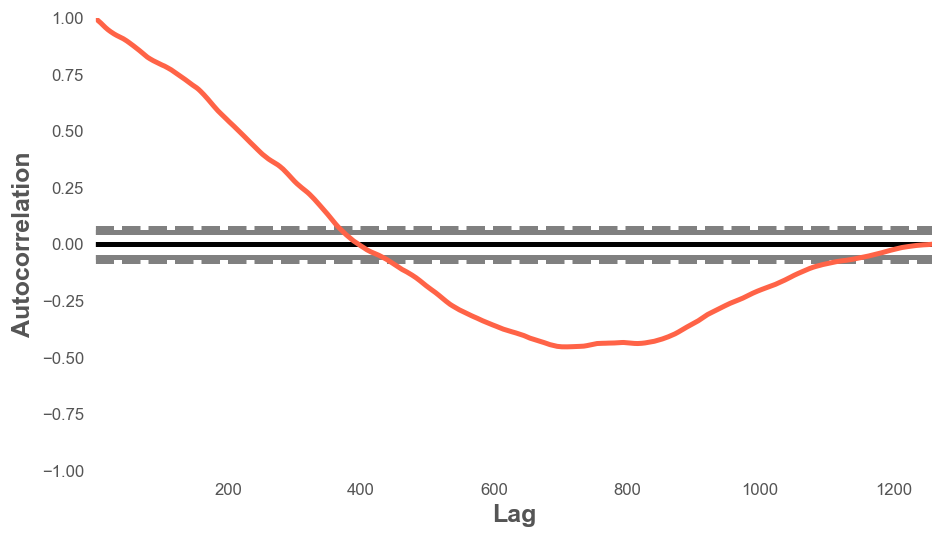

In [21]:

with plt.style.context('images/presentation.mplstyle'):
    plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
    autocorrelation_plot(AAL.Close.tolist())

> no clear spikes to spot seasonality 

## Forecastability

The more regular and repeatable patterns a time series has, the easier it is to forecast.
Approximate Entropy can be used to quantify the regularity and unpredictability of fluctuations in a time series.
The higher the approximate entropy, the more difficult it is to forecast it.
Sample Entropy is similar to approximate entropy but without the biase for smaller dataset as in approximate entropy

In [22]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))


In [23]:
print(ApEn(AAL.Close.values, m=2, r=0.2*np.std(AAL.Close.values))) 

0.16694997633239517


In [24]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [25]:
print(SampEn(AAL.Close.values, m=2, r=0.2*np.std(AAL.Close.values))) 

0.1491009682119872


## Moving average 

In [26]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

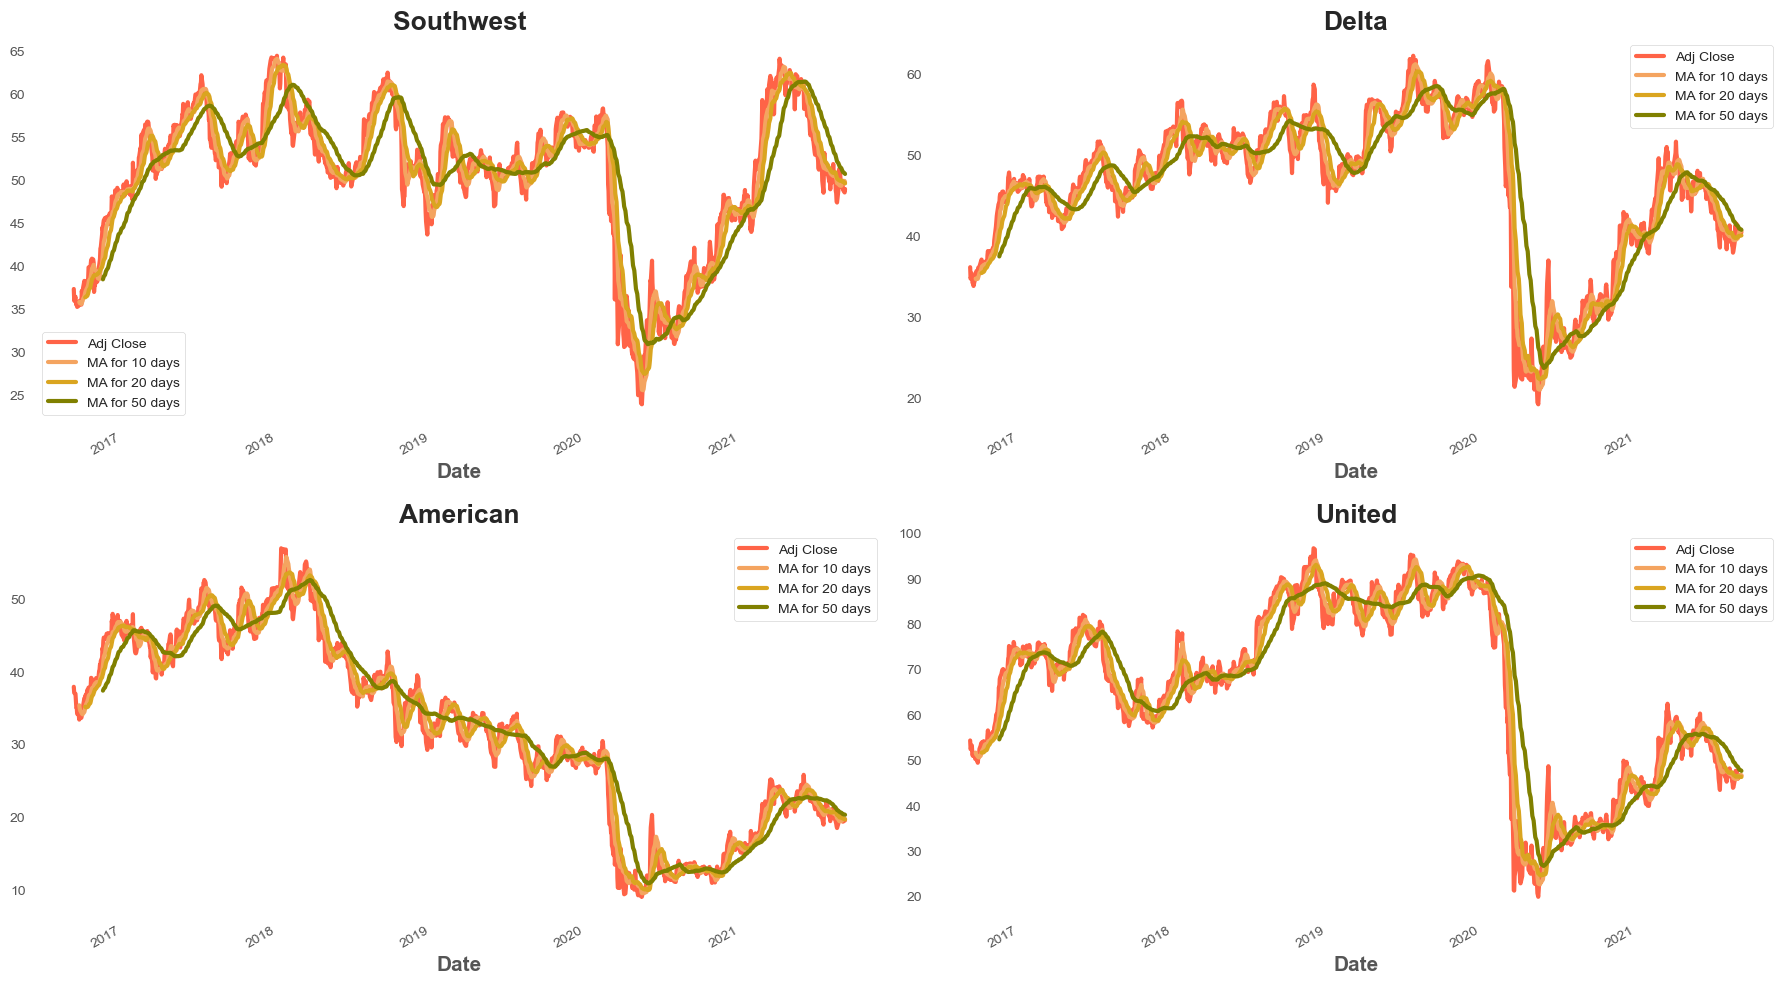

In [27]:
with plt.style.context('images/presentation.mplstyle'):

    fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize=(18,10))
    for axx, company in zip(axes.flatten(), company_list):
        company[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axx)
        axx.set_title(company["company_name"][0])

    fig.tight_layout()

## Daily return

In [28]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

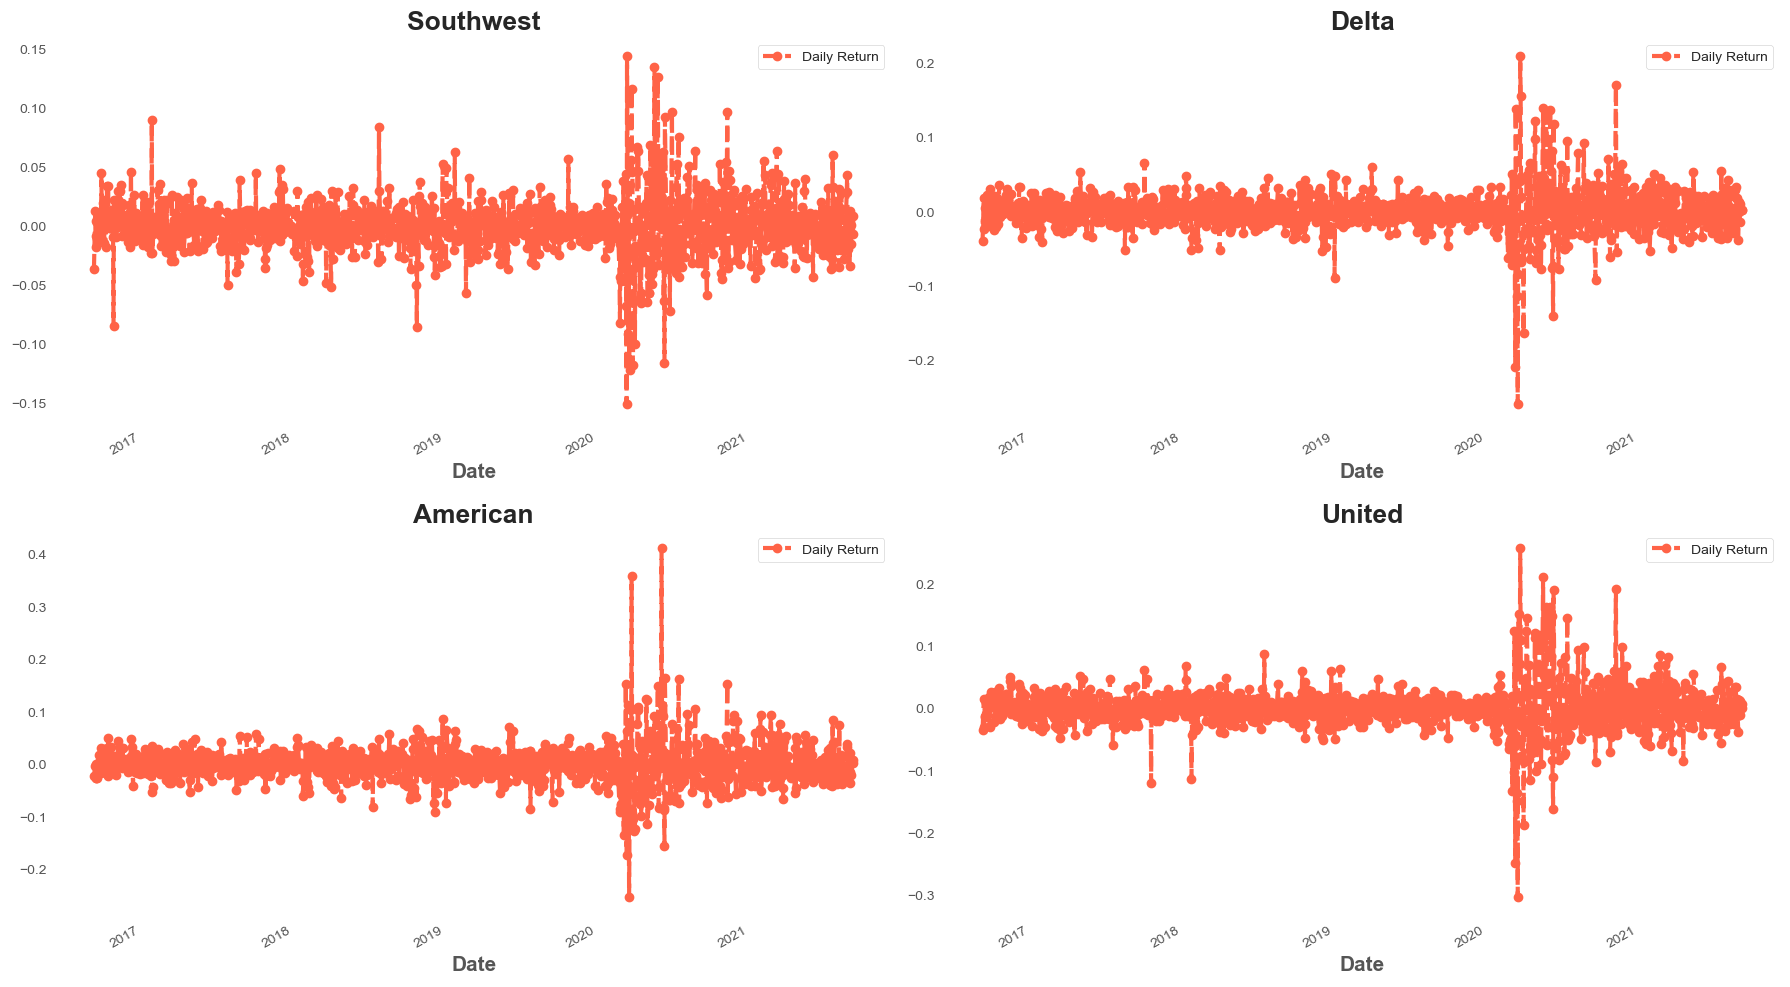

In [29]:

with plt.style.context('images/presentation.mplstyle'):
    fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize=(18,10))

    for axx, company in zip(axes.flatten(), company_list):
        company[['Daily Return']].plot(ax=axx, legend=True, linestyle='--', marker='o')
        axx.set_title(company["company_name"][0])

    fig.tight_layout()

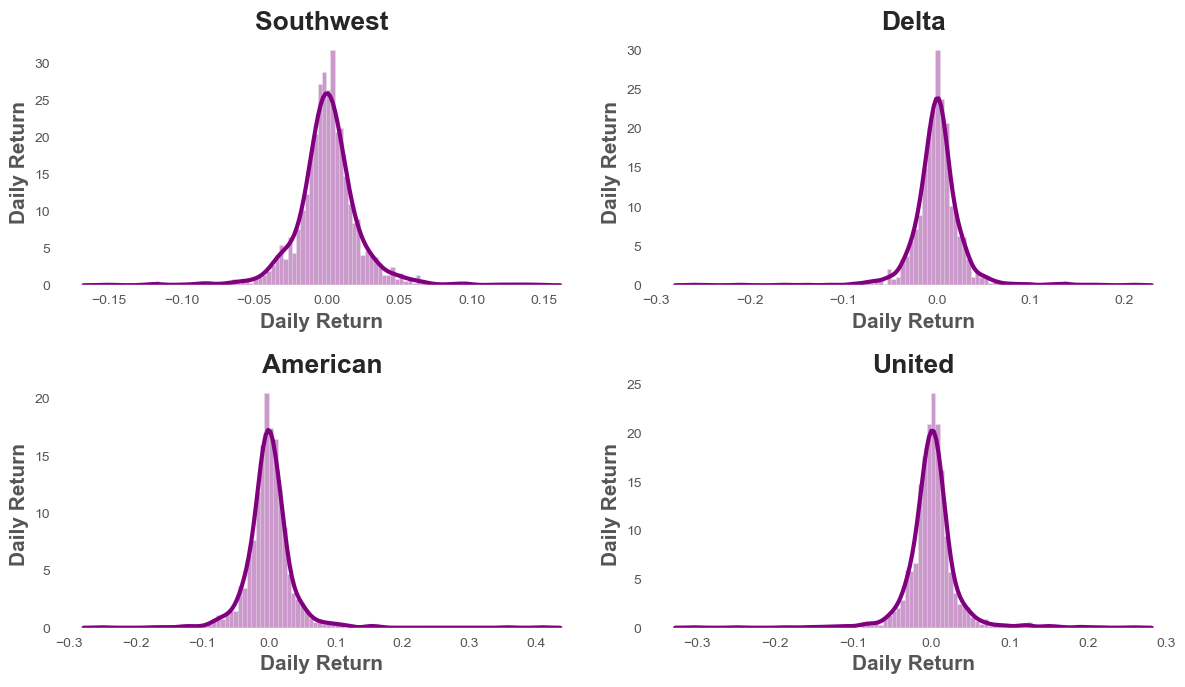

In [30]:
# need to include dropna() since NaN values can't be read by seaborn
with plt.style.context('images/presentation.mplstyle'):

    plt.figure(figsize=(12, 7))

    for i, company in enumerate(company_list, 1):
        plt.subplot(2, 2, i)
        sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
        plt.ylabel('Daily Return')
        plt.title(f'{company_name[i - 1]}')
    #AAPL['Daily Return'].hist()
    plt.tight_layout()

## Comparing correlation between different stocks adjusting closing prices

The adjusted closing price analyzes the stock's dividends, stock splits and new stock offerings to determine an adjusted value. The adjusted closing price reflects the change in stock value caused by new offerings from the corporation. New offerings are when a corporation may choose to offer additional shares of stock, which is often done to raise additional money.

In [31]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(stock_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,LUV,DAL,AAL,UAL
Date,,,,
2016-09-08,37.296150,36.133644,37.929455,54.360001
2016-09-09,35.929779,34.717361,37.100506,52.450001
2016-09-12,36.391651,35.351929,36.955925,53.250000
2016-09-13,35.737324,34.515038,36.020939,51.639999
2016-09-14,35.448666,34.137974,35.076305,51.000000


In [32]:
stock_pct = closing_df.pct_change()
stock_pct.head()

Symbols,LUV,DAL,AAL,UAL
Date,,,,
2016-09-08,NaN,NaN,NaN,NaN
2016-09-09,-0.036636,-0.039196,-0.021855,-0.035136
2016-09-12,0.012855,0.018278,-0.003897,0.015253
2016-09-13,-0.017980,-0.023673,-0.025300,-0.030235
2016-09-14,-0.008077,-0.010925,-0.026225,-0.012393


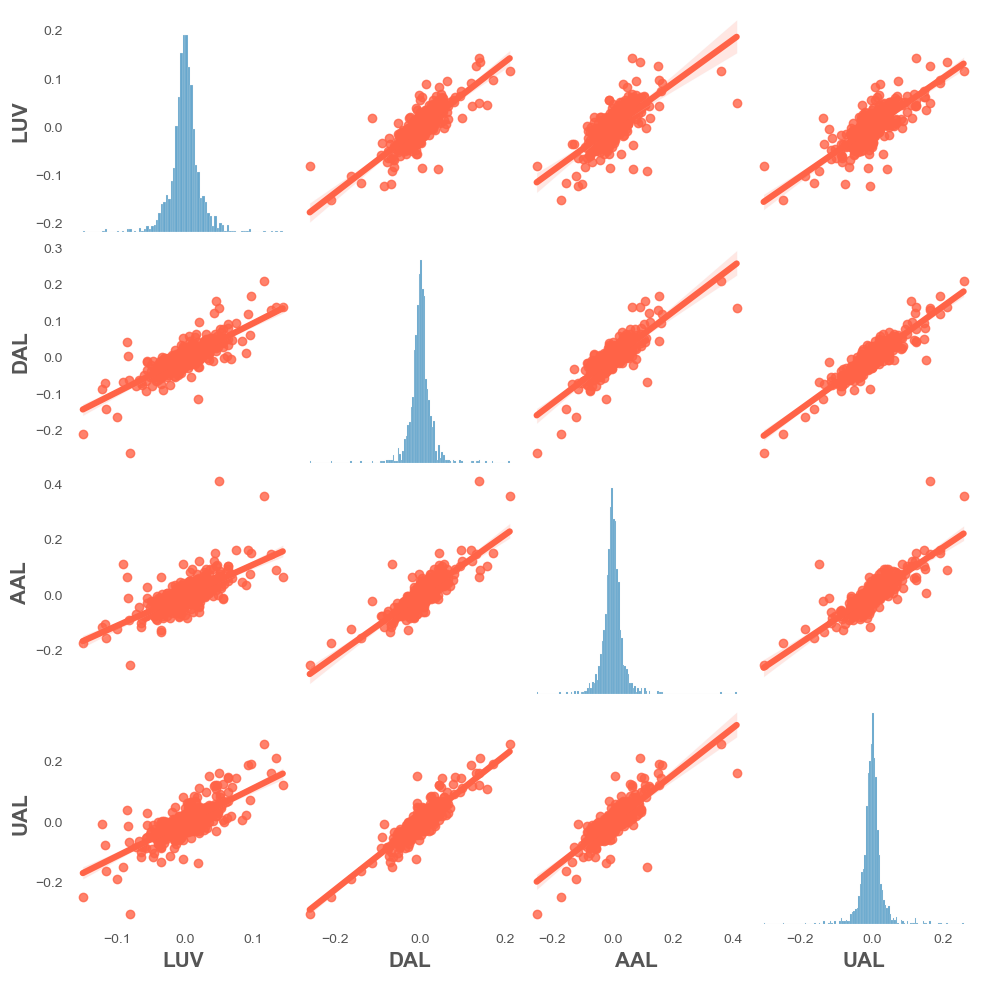

In [33]:
with plt.style.context('images/presentation.mplstyle'):
    sns.pairplot(stock_pct, kind='reg')

>  if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

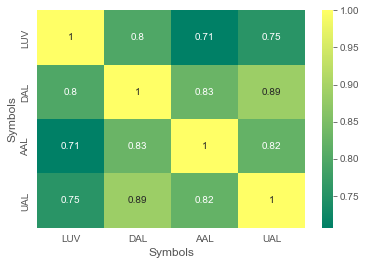

In [34]:
sns.heatmap(stock_pct.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

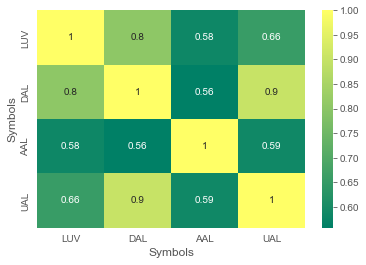

In [35]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

## Risk evaluation

using daily percentage returns to compare the expected return with the standard deviation of the daily returns.

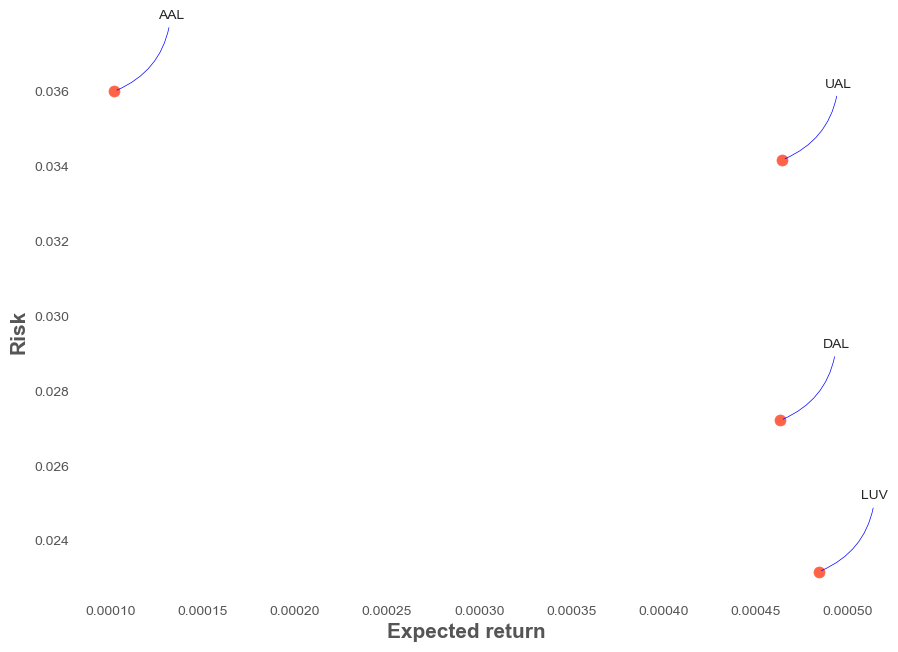

In [36]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
with plt.style.context('images/presentation.mplstyle'):
    pct = stock_pct.dropna()

    area = np.pi * 20

    plt.figure(figsize=(10, 7))
    plt.scatter(pct.mean(), pct.std(), s=area)
    plt.xlabel('Expected return')
    plt.ylabel('Risk')

    for label, x, y in zip(pct.columns, pct.mean(), pct.std()):
        plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                     arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
    
#plt.savefig('images/risk.png')

## Smoothen 
- using moving average to remove noise to better visualize the underlying trend
- use differencing 

### Loess Smoothing (5% and 15%)

In [37]:
from statsmodels.nonparametric.smoothers_lowess import lowess
df_aal = AAL['Close'].rolling(3, center=True, closed='both').mean()

In [38]:
df_aal_loess_5 = pd.DataFrame(lowess(AAL['Close'], np.arange(len(AAL['Close'])), frac=0.05)[:, 1], index=AAL['Close'].index, columns=['value'])
df_aal_loess_15 = pd.DataFrame(lowess(AAL['Close'], np.arange(len(AAL['Close'])), frac=0.15)[:, 1], index=AAL['Close'].index, columns=['value'])

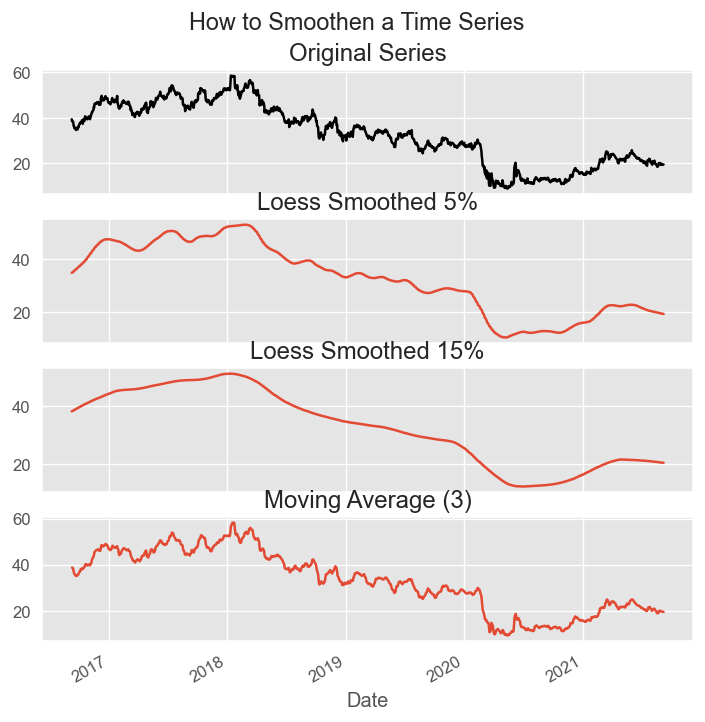

In [39]:
# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
AAL['Close'].plot(ax=axes[0], color='k', title='Original Series')
df_aal_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_aal_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_aal.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

## Stationary Data

In [40]:
def stationarity_check(TS):
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS)
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

### Differencing 

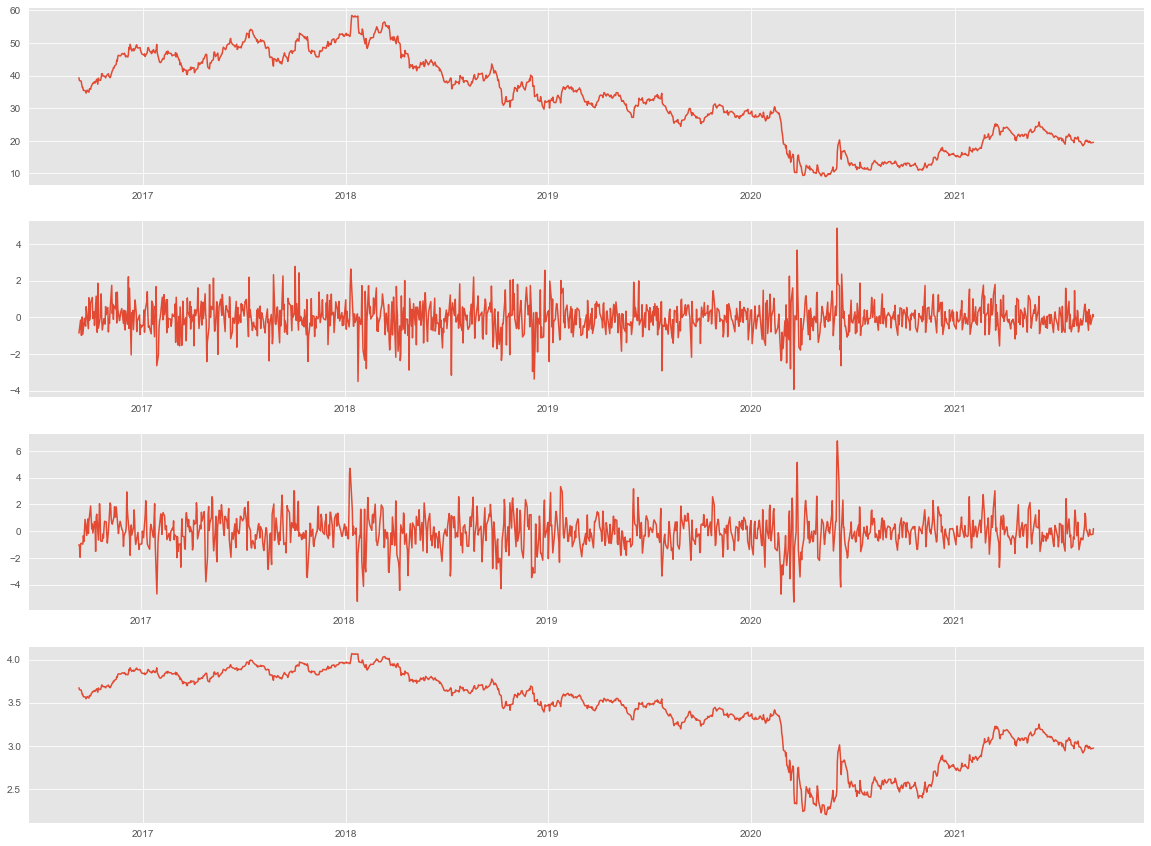

In [41]:
fig, ax = plt.subplots(4, 1, figsize=(20, 15))
AAL["diff_1"] = AAL["Close"].diff(periods=1)
AAL["diff_2"] = AAL["Close"].diff(periods=2)


ax[0].plot(AAL["Close"], label="Original series")
ax[1].plot(AAL["diff_1"], label="1 period differencing")
ax[2].plot(AAL["diff_2"], label="2 period differencing")
ax[3].plot(np.log(AAL["Close"]), label="After log transform")

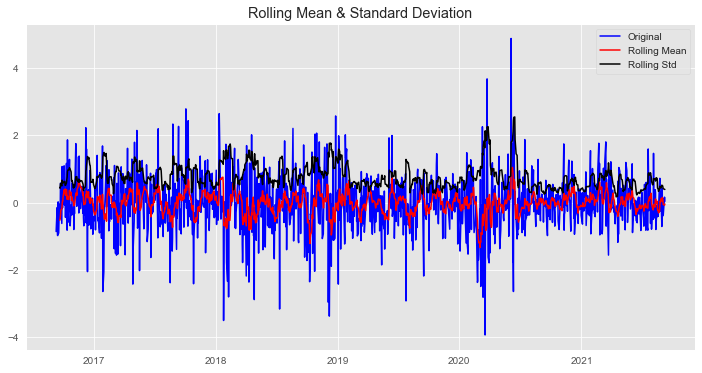

Results of Dickey-Fuller Test: 

Test Statistic                  -33.310353
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1257.000000
Critical Value (1%)              -3.435563
Critical Value (5%)              -2.863842
Critical Value (10%)             -2.567996
dtype: float64


In [42]:
stationarity_check(AAL["diff_1"].dropna())

### Log transform

In [43]:
AAL["transformed"]=np.log(AAL["Close"]).diff()

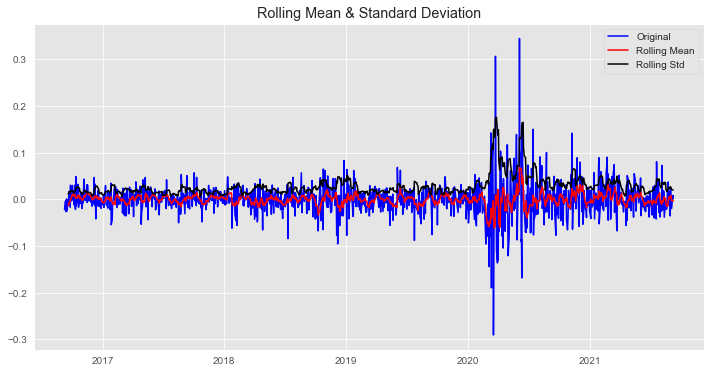

Results of Dickey-Fuller Test: 

Test Statistic                -8.704754e+00
p-value                        3.726189e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.246000e+03
Critical Value (1%)           -3.435609e+00
Critical Value (5%)           -2.863862e+00
Critical Value (10%)          -2.568006e+00
dtype: float64


In [44]:
stationarity_check(AAL["transformed"].dropna())

### Subtracting rolling statistics 

In [45]:
roll_mean_aal = AAL["Close"].rolling(window=4).mean()

data_minus_roll_mean_aal = AAL["Close"] - roll_mean_aal
data_minus_roll_mean_aal.dropna(inplace=True)
#fig = plt.figure(figsize=(11,7))
#plt.plot(data_minus_roll_mean, color='blue',label='Sales - rolling mean')
#plt.legend(loc='best')
#plt.title('Sales while the rolling mean is subtracted')
#plt.show(block=False)

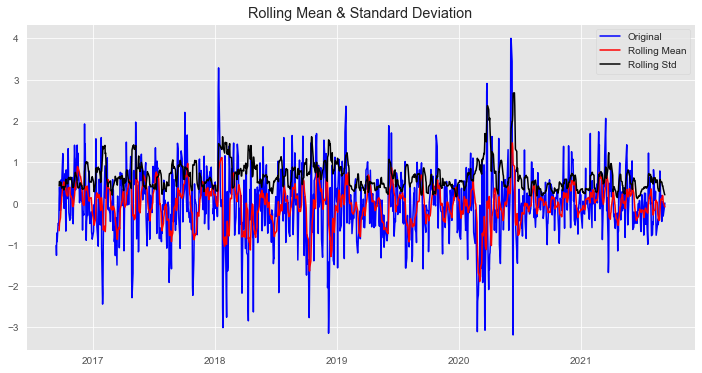

Results of Dickey-Fuller Test: 

Test Statistic                -1.003248e+01
p-value                        1.571701e-17
#Lags Used                     8.000000e+00
Number of Observations Used    1.247000e+03
Critical Value (1%)           -3.435605e+00
Critical Value (5%)           -2.863861e+00
Critical Value (10%)          -2.568005e+00
dtype: float64


In [46]:
stationarity_check(data_minus_roll_mean_aal)

### exponential weighted rolling mean

In [47]:
exp_roll_mean_aal= np.log(AAL["Close"]).ewm(halflife=4).mean()
data_minus_exp_roll_mean_aal = np.log(AAL["Close"]) - exp_roll_mean_aal
ex_aal = data_minus_exp_roll_mean_aal.diff()
ex_aal.dropna(inplace=True)

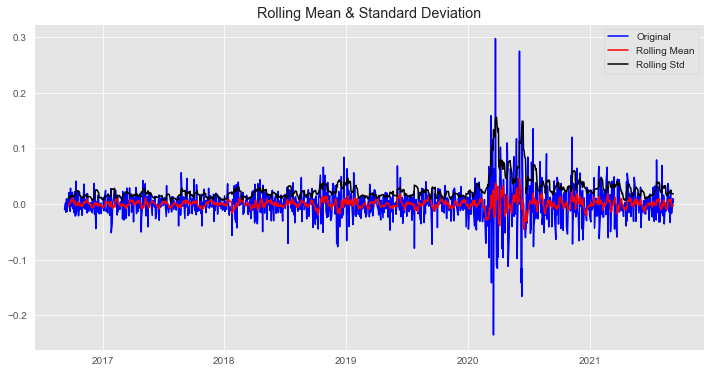

Results of Dickey-Fuller Test: 

Test Statistic                -1.140238e+01
p-value                        7.592556e-21
#Lags Used                     2.200000e+01
Number of Observations Used    1.235000e+03
Critical Value (1%)           -3.435656e+00
Critical Value (5%)           -2.863883e+00
Critical Value (10%)          -2.568018e+00
dtype: float64


In [48]:
stationarity_check(ex_aal)

## Comparing correlation between different lags

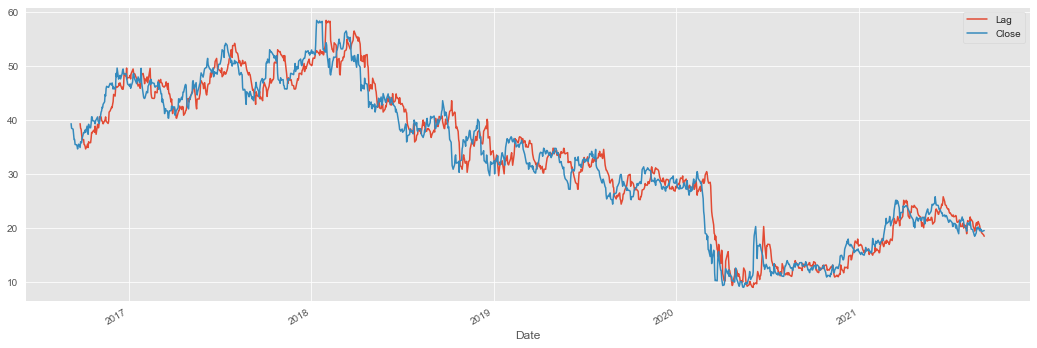

In [49]:
shift_12_aal = AAL["Close"].shift(periods=12)
lag_12_aal = pd.concat([shift_12_aal.rename('Lag') , AAL["Close"]], axis=1)
lag_12_aal.plot(figsize=(18,6));

In [50]:
corr_12_aal= lag_12_aal.dropna().corr()
corr_12_aal

,Lag,Close
Lag,1.000000,0.973121
Close,0.973121,1.000000


In [51]:
shift_4_aal = AAL["Close"].shift(periods=4)
lag_4_aal = pd.concat([shift_4_aal.rename('Lag') , AAL["Close"]], axis=1)
corr_4_aal= lag_4_aal.dropna().corr()
corr_4_aal

,Lag,Close
Lag,1.000000,0.991331
Close,0.991331,1.000000


In [52]:
shift_24_aal = AAL["Close"].shift(periods=24)
lag_24_aal = pd.concat([shift_24_aal.rename('Lag') , AAL["Close"]], axis=1)
corr_24_aal= lag_24_aal.dropna().corr()
corr_24_aal

,Lag,Close
Lag,1.000000,0.947692
Close,0.947692,1.000000


## Moving Average

In [53]:
AAL['MA_7MA'] = AAL['Close'].rolling(window=7).mean()
AAL['MA_15MA'] = AAL['Close'].rolling(window=15).mean()
AAL['MA_30MA'] = AAL['Close'].rolling(window=30).mean()
AAL['MA_60MA'] = AAL['Close'].rolling(window=60).mean()

In [54]:
ewma = pd.Series.ewm
AAL['close_30EMA'] = ewma(AAL["Close"], span=30).mean()

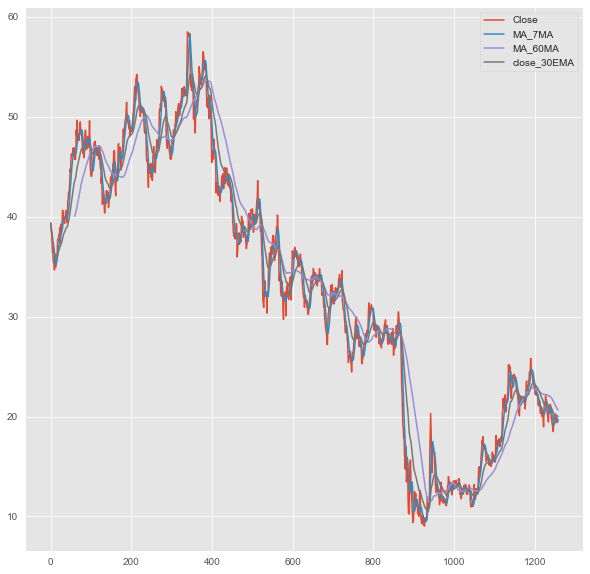

In [55]:
plt.figure(figsize=(10, 10))
plt.plot(AAL['Close'].values)
plt.plot(AAL['MA_7MA'].values)
plt.plot(AAL['MA_60MA'].values)
plt.plot(AAL['close_30EMA'].values)
plt.legend(['Close', 'MA_7MA', 'MA_60MA', 'close_30EMA'])
plt.show()

## MACD
Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of prices.

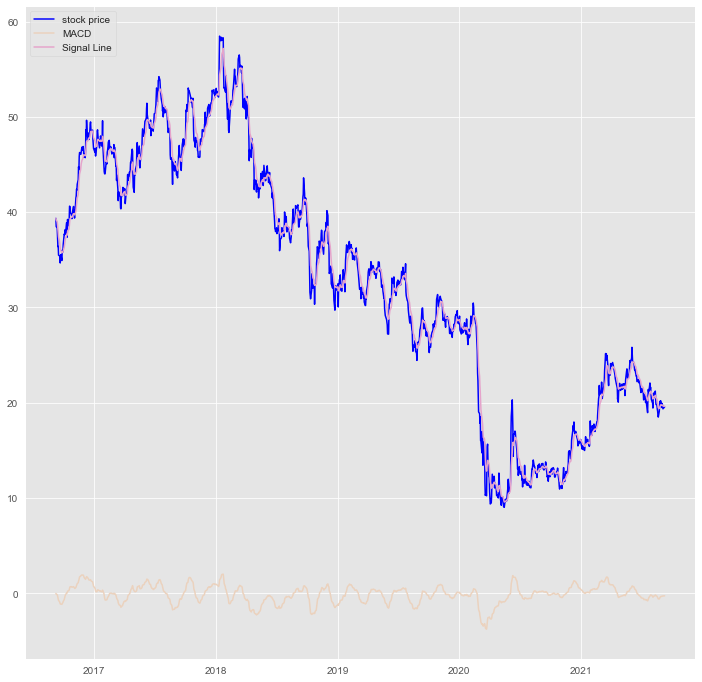

In [56]:
AAL['close_26EMA'] = ewma(AAL["Close"], span=26,adjust=False).mean()
AAL['close_12EMA'] = ewma(AAL["Close"], span=12,adjust=False).mean()

AAL['MACD'] = AAL['close_12EMA'] - AAL['close_26EMA']
AAL['signal'] = ewma(AAL["Close"], span=9,adjust=False).mean()
plt.figure(figsize=(12, 12))
plt.plot(AAL['Close'], label='stock price',color='blue')
plt.plot(AAL['MACD'], label='MACD', color = '#EBD2BE')
plt.plot(AAL['signal'], label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

#plt.savefig('images/MACD.png')

## Bollinger Band

> Middle Band = 20 day moving average

> Upper Band = 20 day moving average + (20 Day standard deviation of price x 2) 

> Lower Band = 20 day moving average - (20 Day standard deviation of price x 2)

> Bandwidth = (upperBB − lowerBB) / middleBB

Text(0, 0.5, 'Price (USD)')

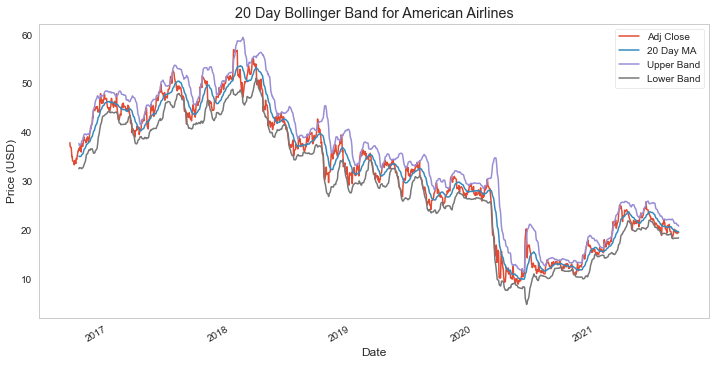

In [57]:
company_list= [LUV, DAL, AAL, UAL]
for item in company_list:
    item['20 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    
    # set .std(ddof=0) for population std instead of sample
    item['20 Day STD'] = item['Adj Close'].rolling(window=20).std() 
    item['Upper Band'] = item['20 Day MA'] + (item['20 Day STD'] * 2)
    item['Lower Band'] = item['20 Day MA'] - (item['20 Day STD'] * 2)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
#with plt.style.context('images/presentation.mplstyle'):
sns.set_style("whitegrid", {'axes.grid' : False})
AAL[['Adj Close', '20 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('20 Day Bollinger Band for American Airlines')
plt.ylabel('Price (USD)')
    
#plt.savefig('images/Bollingerg.png')




KeyError: '30 Day MA'

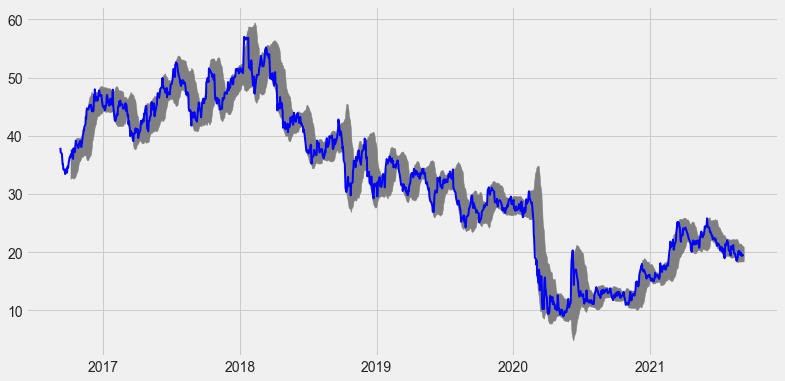

In [58]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for facebook DataFrame
x_axis = AAL.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, AAL['Upper Band'], AAL['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, AAL['Adj Close'], color='blue', lw=2)
ax.plot(x_axis, AAL['30 Day MA'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For American Airlines')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();

## RSI
The Relative Strength Index (RSI), developed by J. Welles Wilder, is a momentum oscillator that measures the speed and change of price movements. 

RSI = 100 – [100 / ( 1 + (Average of Upward Price Change / Average of Downward Price Change ) ) ]

In [ ]:
def rsiFunc(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n+1]
    up = seed[seed>=0].sum()/n
    down = -seed[seed<0].sum()/n
    rs = up/down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100./(1.+rs)

    for i in range(n, len(prices)):
        delta = deltas[i-1] # cause the diff is 1 shorter

        if delta>0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up*(n-1) + upval)/n
        down = (down*(n-1) + downval)/n

        rs = up/down
        rsi[i] = 100. - 100./(1.+rs)

    return rsi

In [ ]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
        # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [ ]:
rsi_6 = rsiFunc(AAL['Close'].values, 6)
rsi_14 = rsiFunc(AAL['Close'].values, 14)
rsi_20 = rsiFunc(AAL['Close'].values, 20)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(rsi_6)
ax.plot(rsi_14)
ax.plot(rsi_20)

xticks = np.linspace(0, 1300, num=20)

ax.legend(['rsi_6', 'rsi_14', 'rsi_20'])
plt.show()